# Note:
* It should note PILOT creats split folder for each data set and puts the all results there.


In [1]:
from PILOT import *
warnings.filterwarnings('ignore')

#  Loading data
 * Using "extract_data_anno_scRNA_from_h5ad" function, first you need to load the object, and then by just setting the correct name for emb_matrix(for example PCA) and the columns that show cell_type/clusters, sampleID and status extract needed data for PILOT.


### Loading data from h5ad:
* You need to first download the "myocardial_infarction" h5ad object form the provided link.

!wget  https://costalab.ukaachen.de/open_data/PILOT/myocardial_infarction.h5ad

In [2]:
#First read the object,
adata=load_h5ad('myocardial_infarction.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 115517 × 28408
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'doublet_score', 'doublet', 'dissociation_s1', 'opt_clust', 'patient', 'batch', 'opt_clust_integrated', 'cell_type', 'ident', 'n_genes', 'cell_subtype', 'cell_subtype_available', 'cell_subtype2', 'sampleID', 'patient_group', 'Status'
    obsm: 'HARMONY', 'PCA', 'UMAP_HARMONY'
    layers: 'logcounts'

In [4]:
#Please set the needed colums for annot_columns with the given order
data,annot,path_to_results=extract_data_anno_scRNA_from_h5ad(adata,emb_matrix='PCA',clusters_col='cell_subtype',sample_col='sampleID',status='Status' ,name_dataset='myocardial_infarction')

## Cluster representations by estimating regularized probability distributions of cell types per sample:

In [5]:
Clu_rep = Cluster_Representations(annot,regulizer = 0.1,regularization=True) # Regularization

##  Calcuating  cost matrix between clusters:

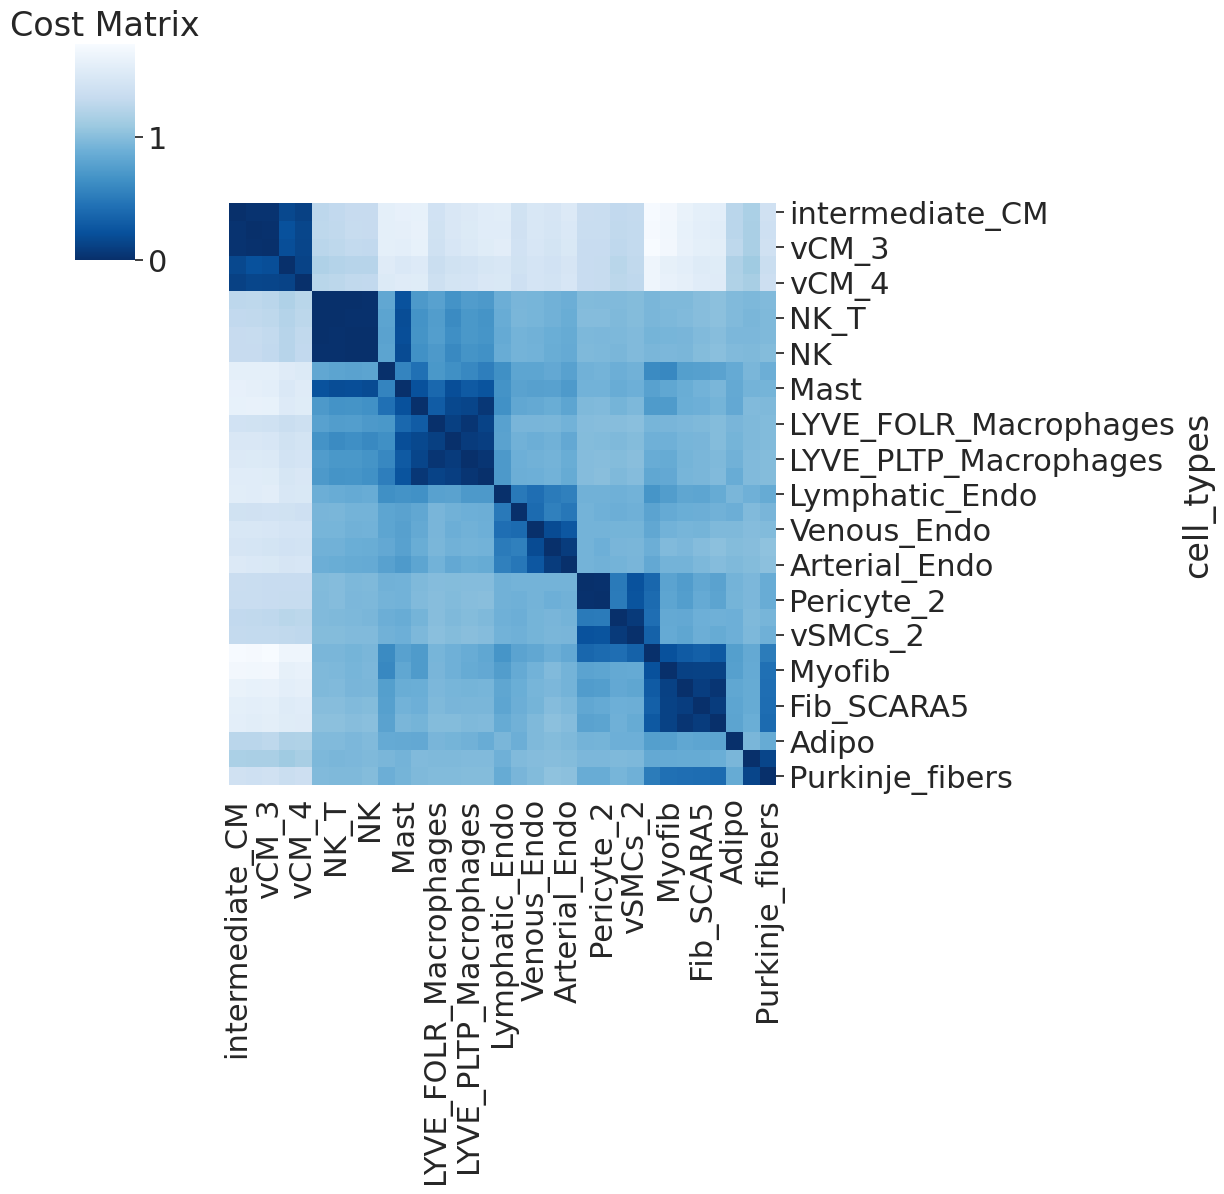

In [6]:
dis= cost_matrix(annot, data,path_to_results,cell_col = 0)

# Estimate the Wasserstein distance:

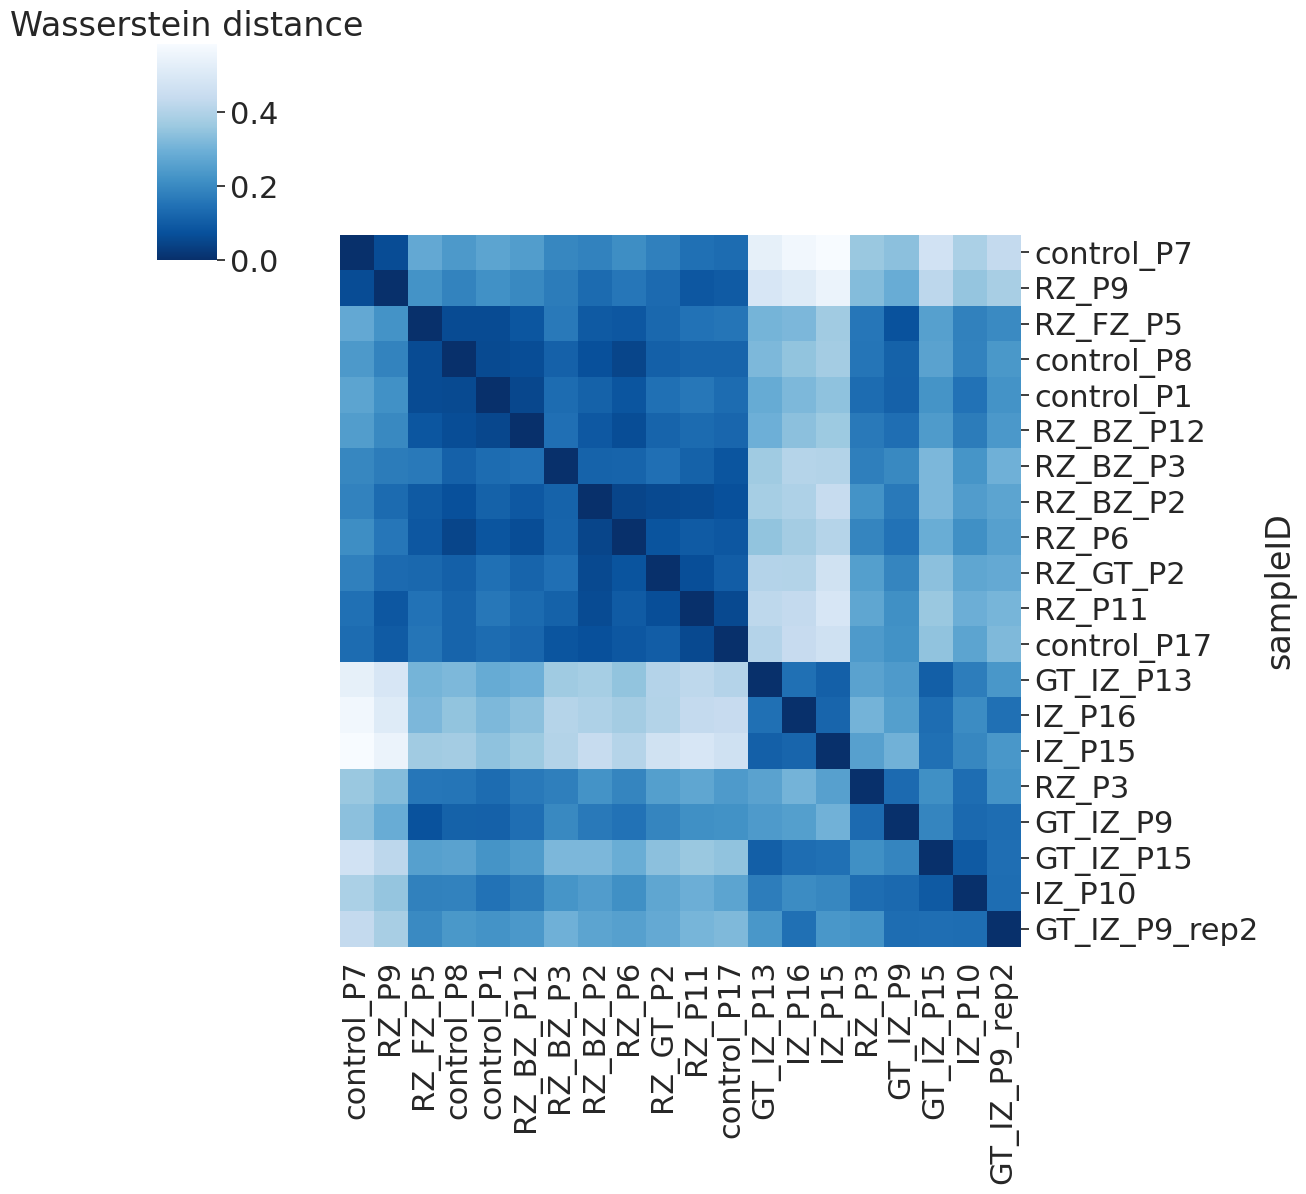

In [7]:
EMD = wasserstein_d(Clu_rep,dis/dis.max(),regularized = 'unreg',path = path_to_results)

## Evaluation:

Cluster labels:  ['control', 'IZ']
Categories (2, object): ['IZ', 'control']
ARI:  0.9
Silhouette score:  0.739256093727161


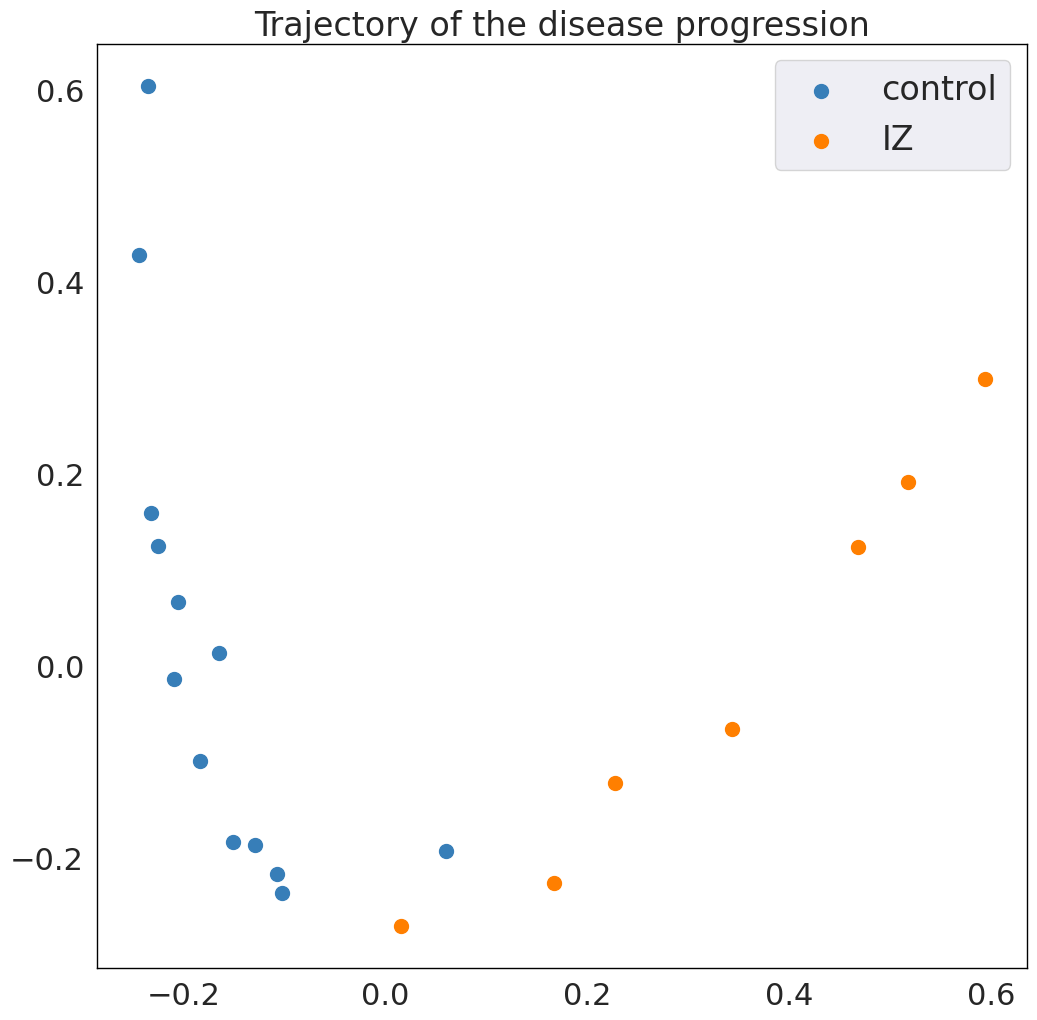

In [8]:
# Computing ARI
predicted_labels, ARI, real_labels = Clustering(EMD/EMD.max(), annot,category ='status', sample_col=1, res = 0.01)
#Computing Sil
Silhouette = Sil_computing(EMD/EMD.max(), real_labels, metric = 'cosine',space = 'diffusion')

#Drawing diffusion map
embedding_diff=trajectory(EMD/EMD.max(), predicted_labels, annot, embed_coord = 'diffusion',path = path_to_results,label_act=False,location_labels='best')


#  Cell-type importance

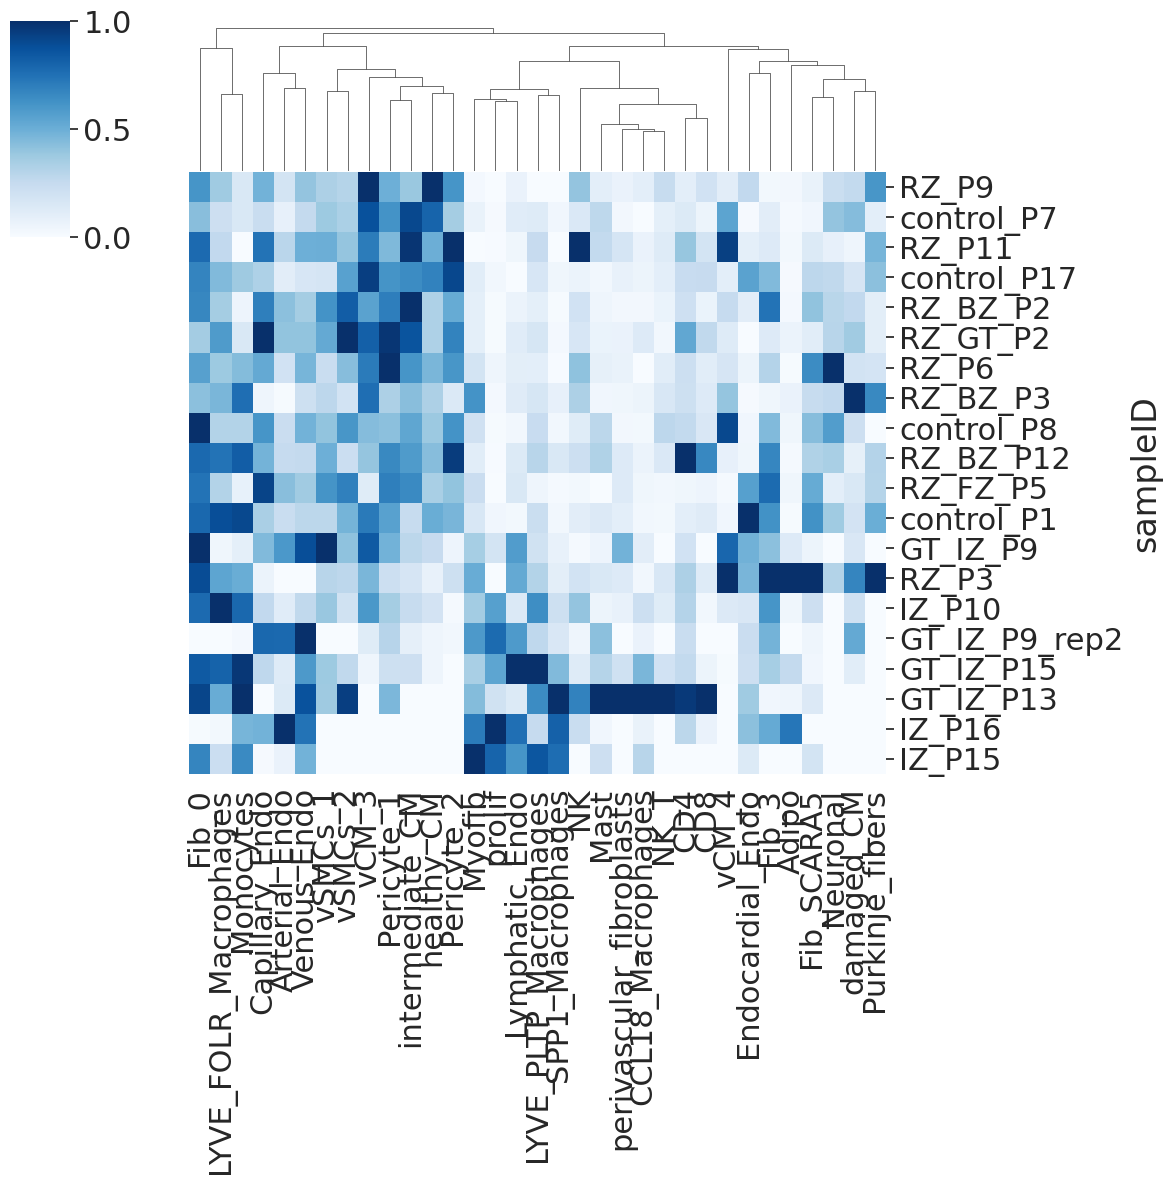

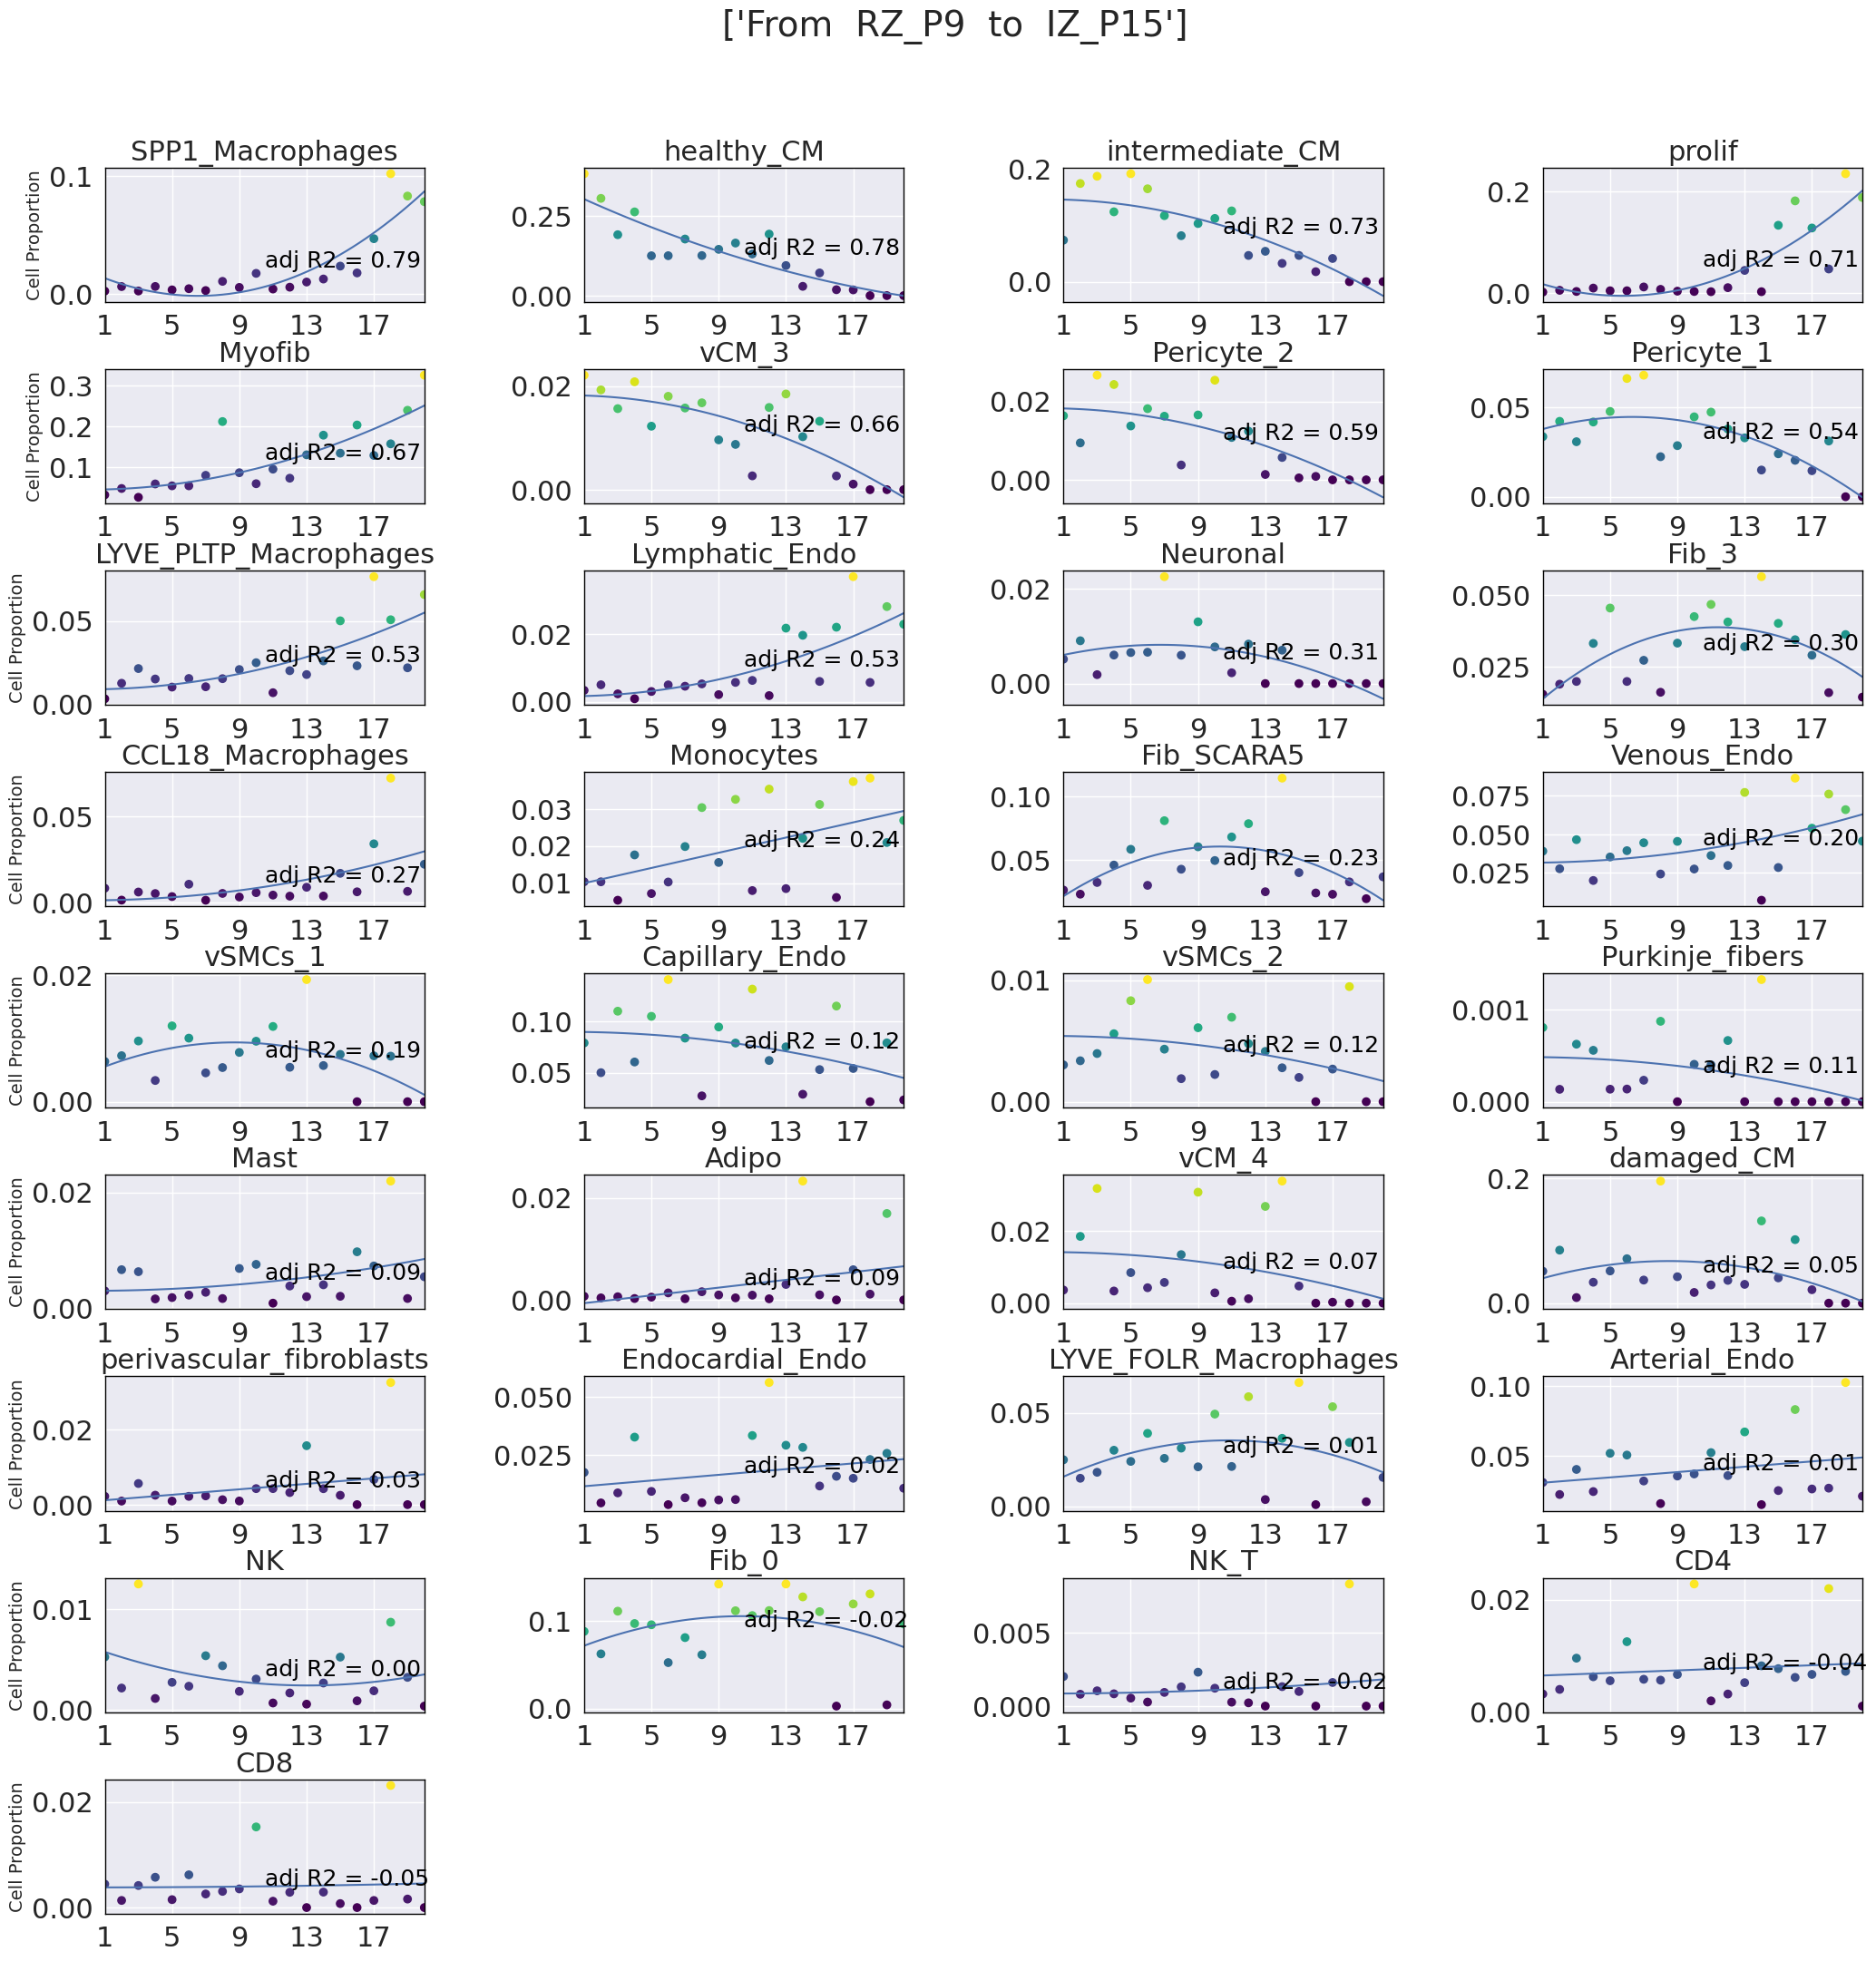

In [9]:
orders,cell_names=Cell_importance(Clu_rep,annot,embedding_diff,real_labels,path=path_to_results,sort_axis='emb_x',width=30,height=35,xlim=4,p_val=1)

## Extract gene expressions from Original object :
This step extracts genes associated with each cell_type (your insterested cells) and map them with the obtained time by PILOT (based on the Trjaectory order of Samples).

* It uses the cell_names list from the previous step.
* You need to use the orinigal obejct (h5ad) to extract genes of each cell-type, we provide the "extract_cells_from_gene_expression" function that you just need to set names of columns that show cell_types/clusters and Samples/Patinets in your object and Cell_list includes list of your interested cell_types/clusters. you can use the "cell_names" list from the previous step.

* The function "extract_cells_from_gene_expression"  automatically creates a cells folder and put the extracted genes_expression associate with each cell and  obtained time by PILOT(orders).





In [10]:
#Takes some time to extract and save the data in cells folder.
extract_cells_from_gene_expression(adata,orders,sample_col='sampleID',col_cell='cell_subtype',cell_list=['healthy_CM','Myofib'],path_results=path_to_results)

# Gene selection:

###  Healthy_CM Celltype

Name of Cell type : healthy_CM
sparsity:0.6932279564364608
For this cell_type, p-value of  3011 genes are statistically significant.
           Expression pattern  count
4    linear up quadratic down   1249
2    linear down quadratic up    558
0                 linear down    517
3                   linear up    310
6              quadratic down    262
7                quadratic up    105
1  linear down quadratic down      8
5      linear up quadratic up      2
data saved successfully


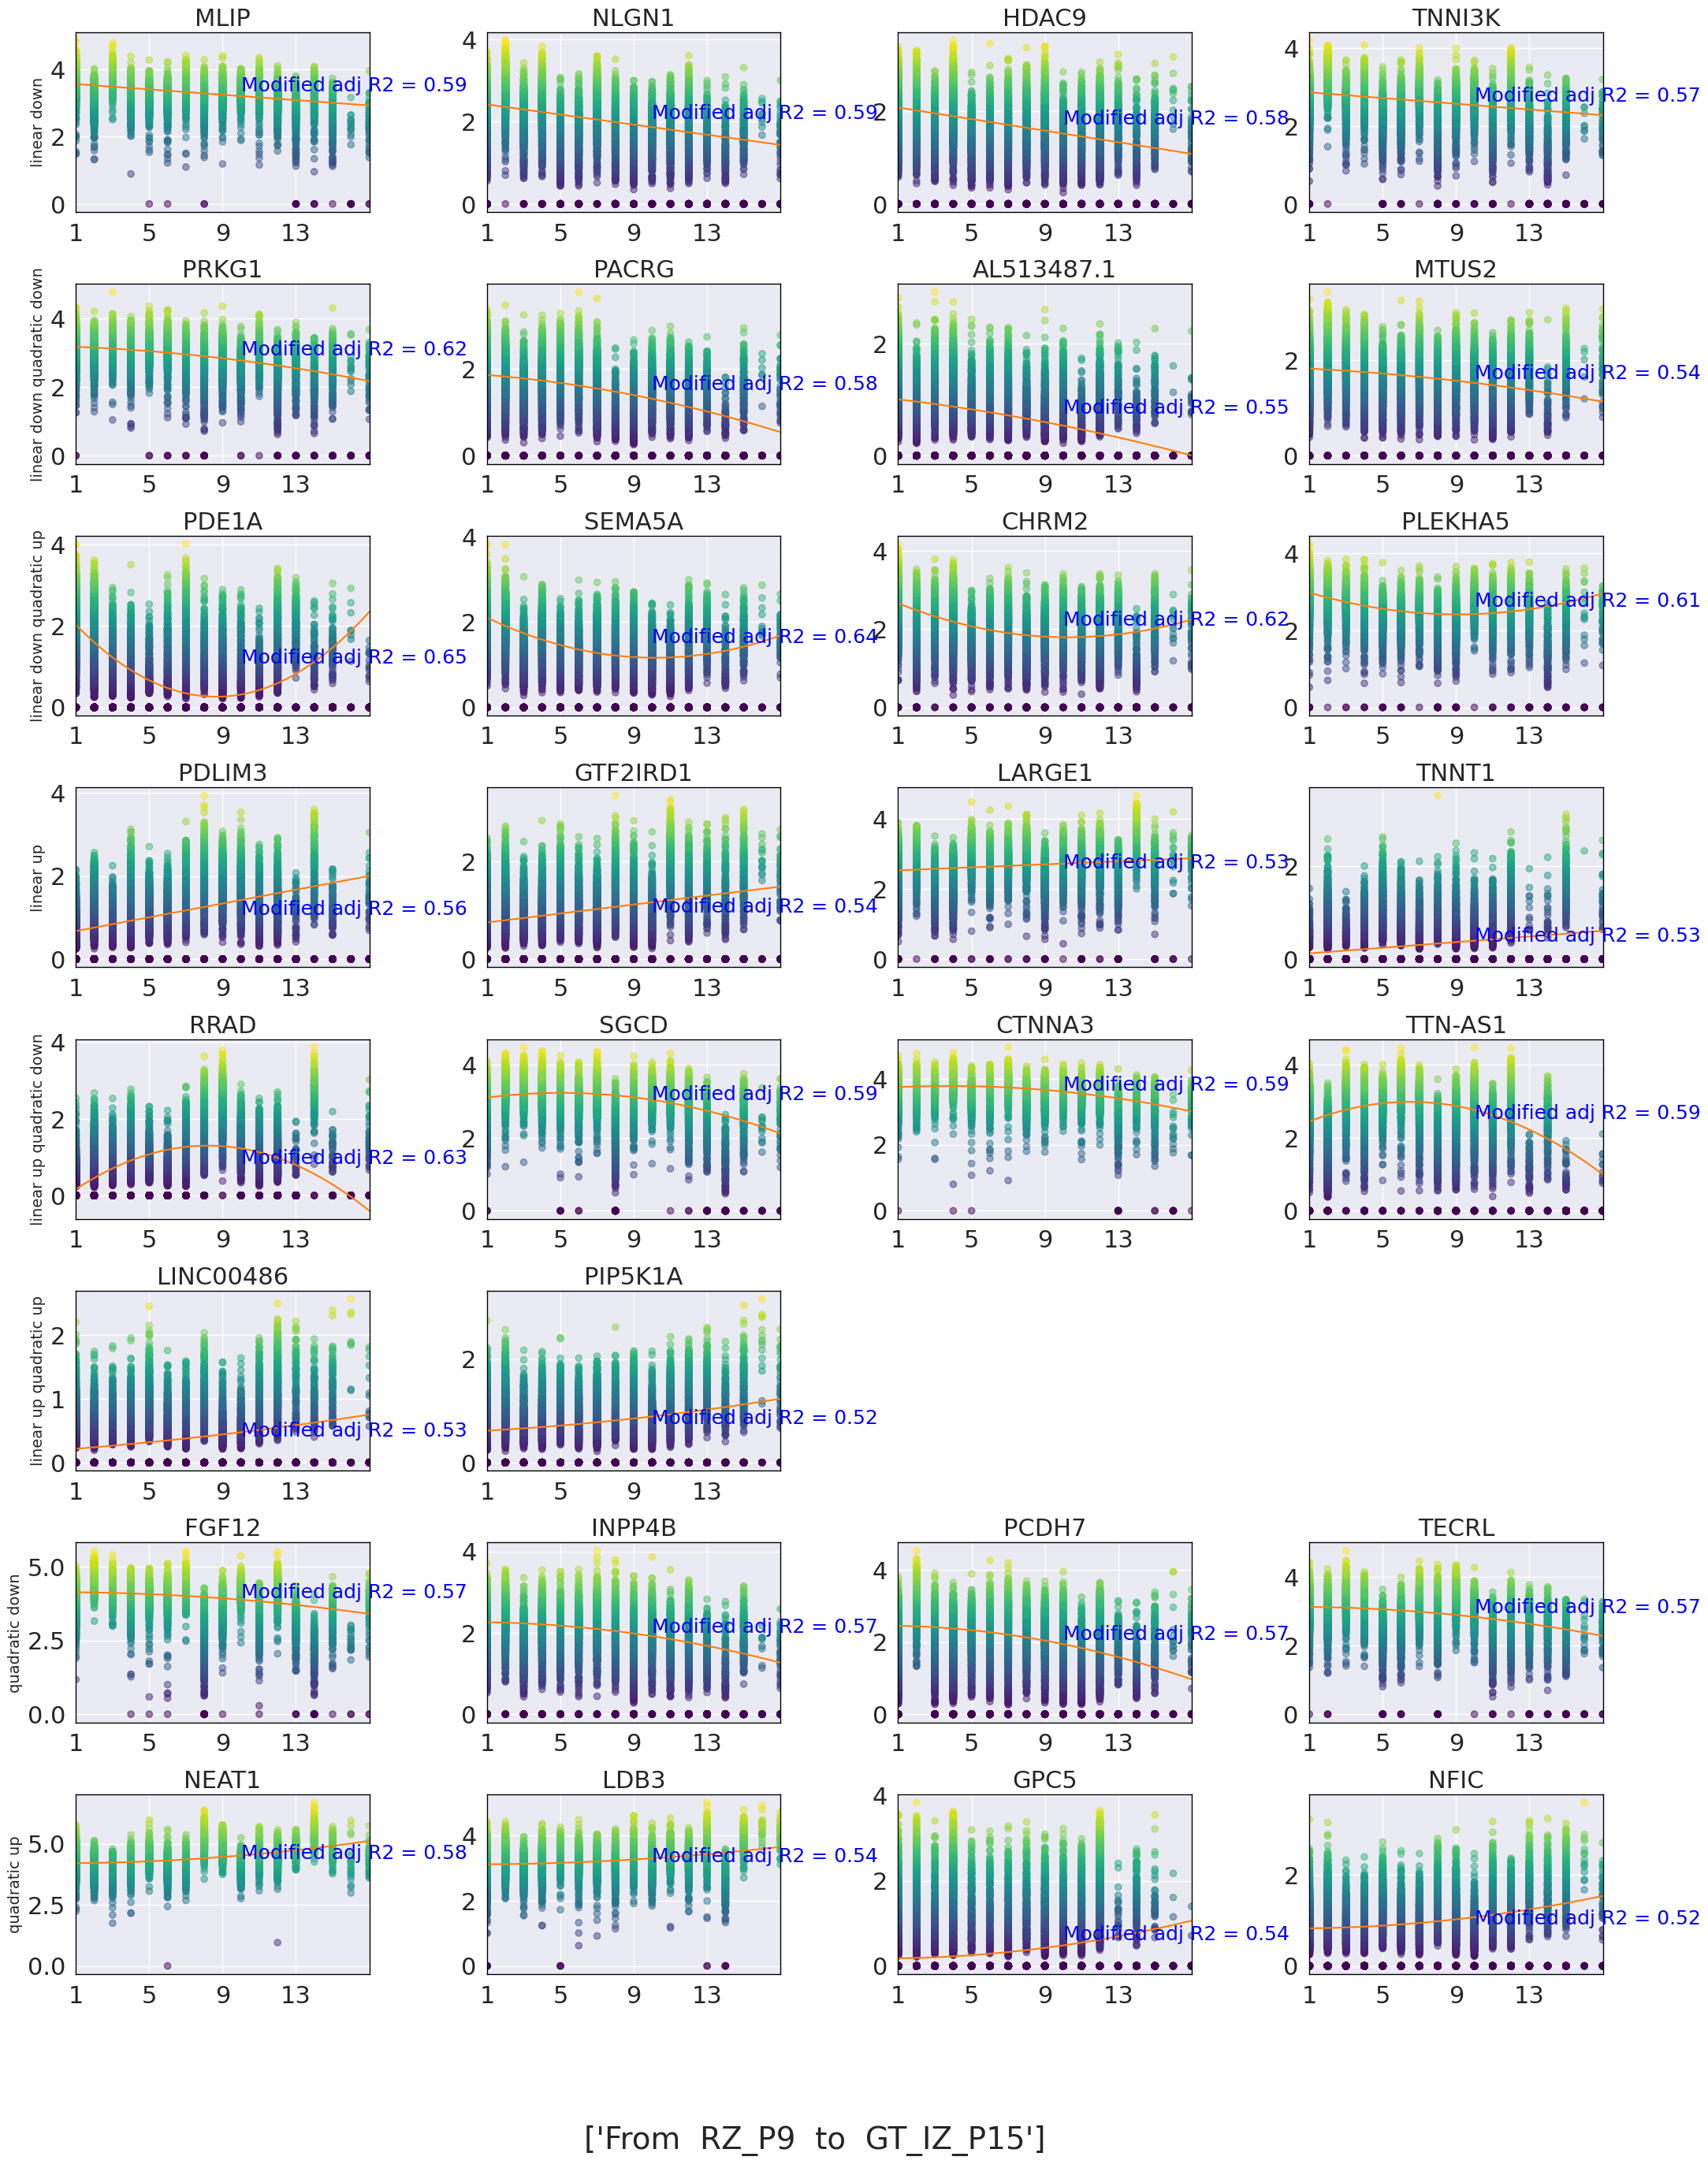

In [11]:
#This step takes time
#Check the Results_PILOT/myocardial_infarction/Markers folder for saved results after finishing this part.  
cell_n=cell_names[1] 
data =loadTarget(path_to_results+'/cells/', cell_n)
pro=proportions(data)  #Caculate the proportion of Zero for genes
fiternames_pro=list(pro[pro['proportion']> 0.95]['Gene ID']) #Filter genes with high probability zero fraction
data=data[data.columns[~data.columns.isin(fiternames_pro)]]
genes_importance(pro,data,path=path_to_results,name_cell=cell_n,col='Time_score',genes_index=list(range(2, data.shape[1])),p_value=0.01,max_iter_huber=500,epsilon_huber=1.35,genes_interesting=[])


### Myofib cell-type

Name of Cell type : Myofib
sparsity:0.8275345974980163
For this cell_type, p-value of  712 genes are statistically significant.
           Expression pattern  count
5              quadratic down    197
4    linear up quadratic down    192
2    linear down quadratic up    142
0                 linear down    119
6                quadratic up     28
3                   linear up     20
1  linear down quadratic down     14
data saved successfully


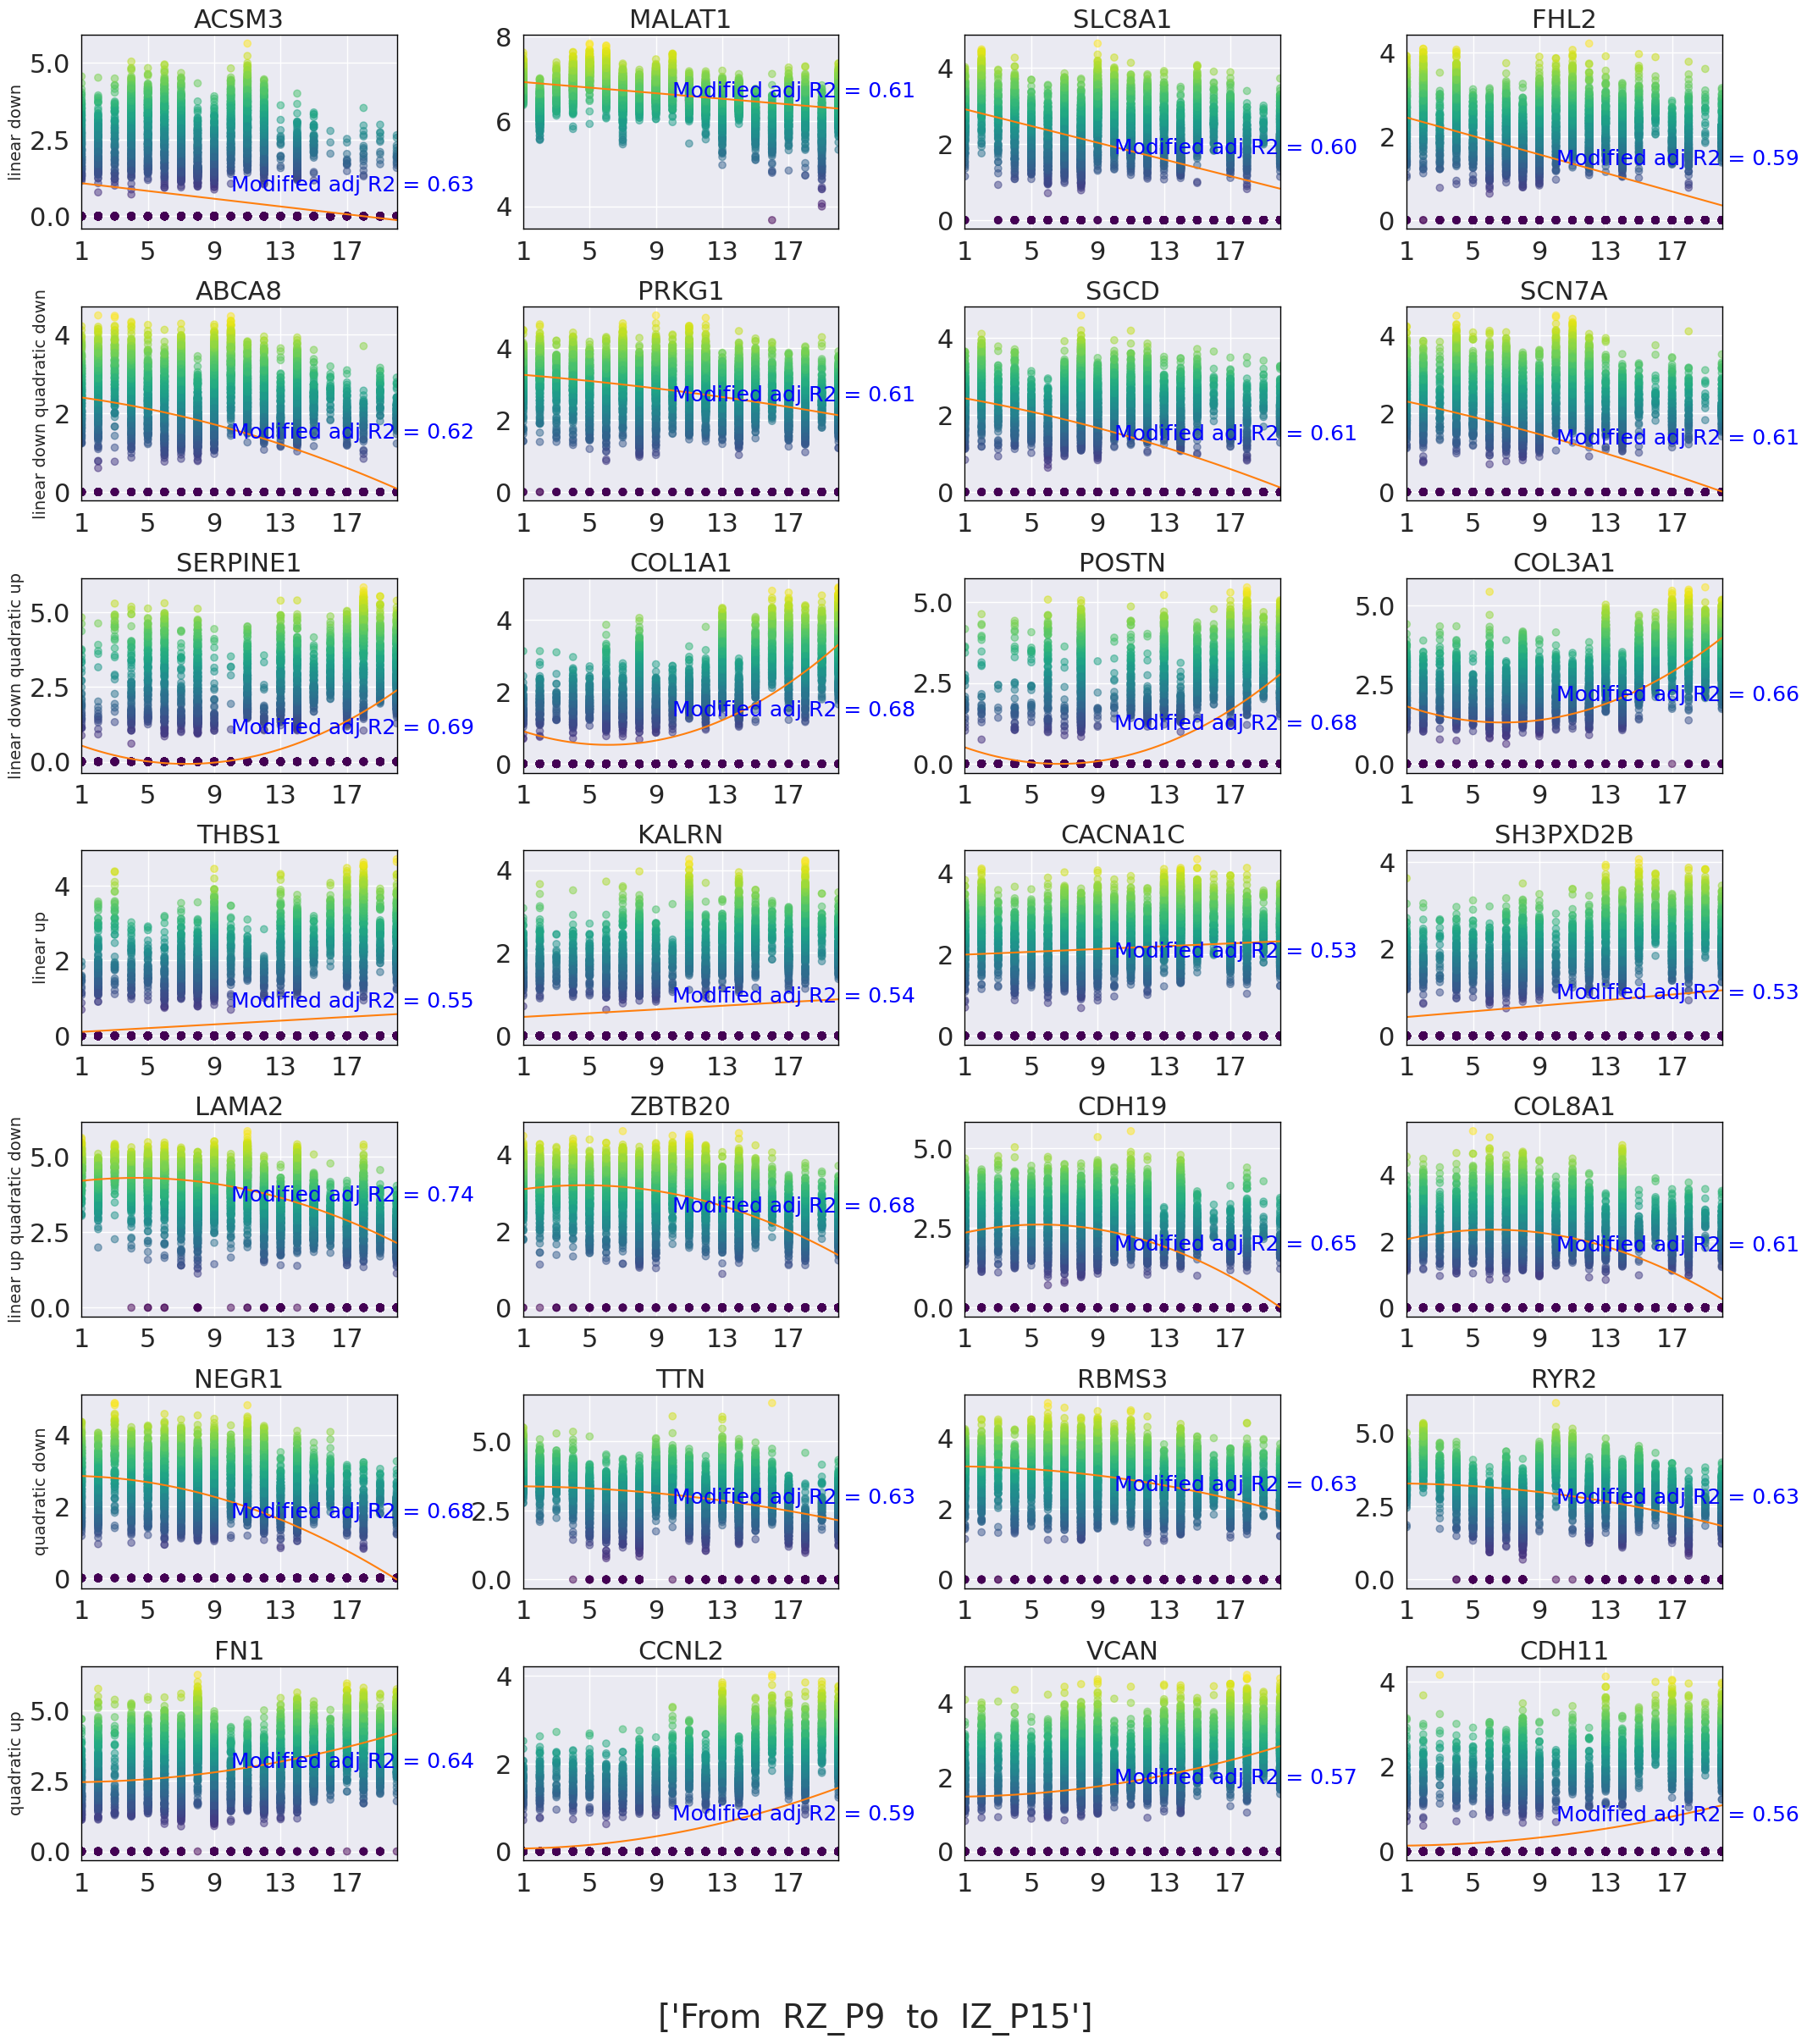

In [13]:
cell_n=cell_names[4]
data =loadTarget(path_to_results+'/cells/', cell_n)
pro=proportions(data)
fiternames_pro=list(pro[pro['proportion']> 0.95]['Gene ID'])
data=data[data.columns[~data.columns.isin(fiternames_pro)]]
genes_importance(pro,data,path=path_to_results,name_cell=cell_n,col='Time_score',genes_index=list(range(2, data.shape[1])),p_value=0.01,max_iter_huber=500,epsilon_huber=1.35,genes_interesting=[])


In [15]:
import sys
for module in sys.modules:
    try:
        print(module,sys.modules[module].__version__)
    except:
        try:
            if  type(modules[module].version) is str:
                print(module,sys.modules[module].version)
            else:
                print(module,sys.modules[module].version())
        except:
            try:
                print(module,sys.modules[module].VERSION)
            except:
                pass

re 2.2.1
ipykernel._version 6.19.2
json 2.0.9
jupyter_client._version 7.4.8
traitlets._version 5.7.1
traitlets 5.7.1
logging 0.5.1.2
platform 1.0.8
_ctypes 1.1.0
ctypes 1.1.0
zmq.sugar.version 24.0.1
zmq.sugar 24.0.1
zmq 24.0.1
socketserver 0.4
argparse 1.1
zlib 1.0
_curses b'2.2'
dateutil 2.8.2
six 1.16.0
_decimal 1.70
decimal 1.70
jupyter_core.version 5.1.0
jupyter_core 5.1.0
platformdirs.version 2.6.0
platformdirs 2.6.0
entrypoints 0.4
jupyter_client 7.4.8
ipykernel 6.19.2
IPython.core.release 8.7.0
executing.version 1.2.0
executing 1.2.0
pure_eval.version 0.2.2
pure_eval 0.2.2
stack_data.version 0.6.2
stack_data 0.6.2
pygments 2.13.0
ptyprocess 0.7.0
pexpect 4.8.0
pickleshare 0.7.5
backcall 0.2.0
decorator 5.1.1
wcwidth 0.2.5
prompt_toolkit 3.0.36
parso 0.8.3
jedi 0.18.2
urllib.request 3.10
IPython 8.7.0
comm 0.1.2
psutil 5.9.4
debugpy.public_api 1.6.4
debugpy 1.6.4
xmlrpc.client 3.10
http.server 0.6
pkg_resources._vendor.more_itertools 8.12.0
pkg_resources.extern.more_itertools 8.